<a href="https://colab.research.google.com/github/hundareshivani/task-3-To-perform-Exploratory-Data-Analysis-on-the-provided-dataset-SampleSuperstore-/blob/main/TASK_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GRIP @ The Sparks Foundation

###Task 3: To perform 'Exploratory Data Analysis' on the provided dataset 'SampleSuperstore'


**Author: SHIVANI HUNDARE**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

**Reading Dataset**

In [3]:
uploaded = files.upload()

Saving SampleSuperstore16.csv to SampleSuperstore16.csv


In [4]:
import io
df = pd.read_csv(io.StringIO(uploaded['SampleSuperstore16.csv'].decode('utf-8')))
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 13)

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


**There are no null values present**

**Checking Duplicate Values**

In [9]:
df.duplicated().sum()


17

**Dropping Duplicate Values And Finding Unique Values**

In [10]:
df.drop_duplicates(inplace=True)
df.nunique()


Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
drop = df.drop(columns='Postal Code', axis=1, inplace=True)
df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


**Correlation**

In [12]:
df.corr()


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


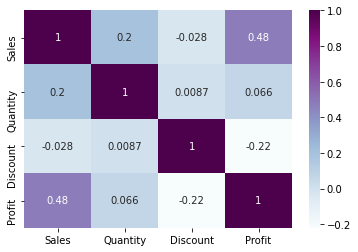

In [13]:
sns.heatmap(df.corr(), cmap = "BuPu" ,annot= True , linecolor="yellow")



**We have removed POSTAL CODE DATA because its presence does not add any
value to our visualization as well as the exploration**

**Data Visuvalization**

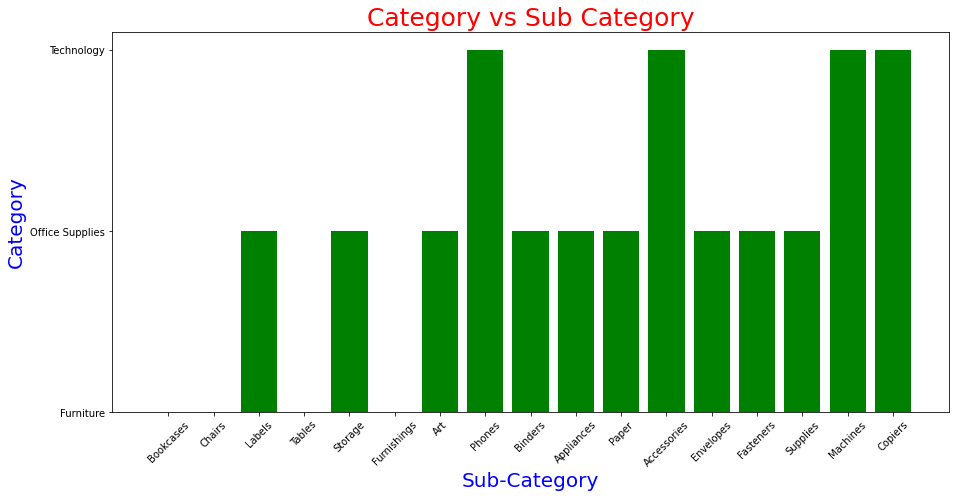

In [14]:
plt.figure(figsize=(15,7))
plt.bar('Sub-Category', 'Category', data=df, color='green')
plt.title('Category vs Sub Category' , size=25 , color = "red")
plt.xlabel('Sub-Category' , size=20 , color = "blue")
plt.ylabel('Category', size=20 , color = "blue")
plt.xticks(rotation=45)
plt.show()

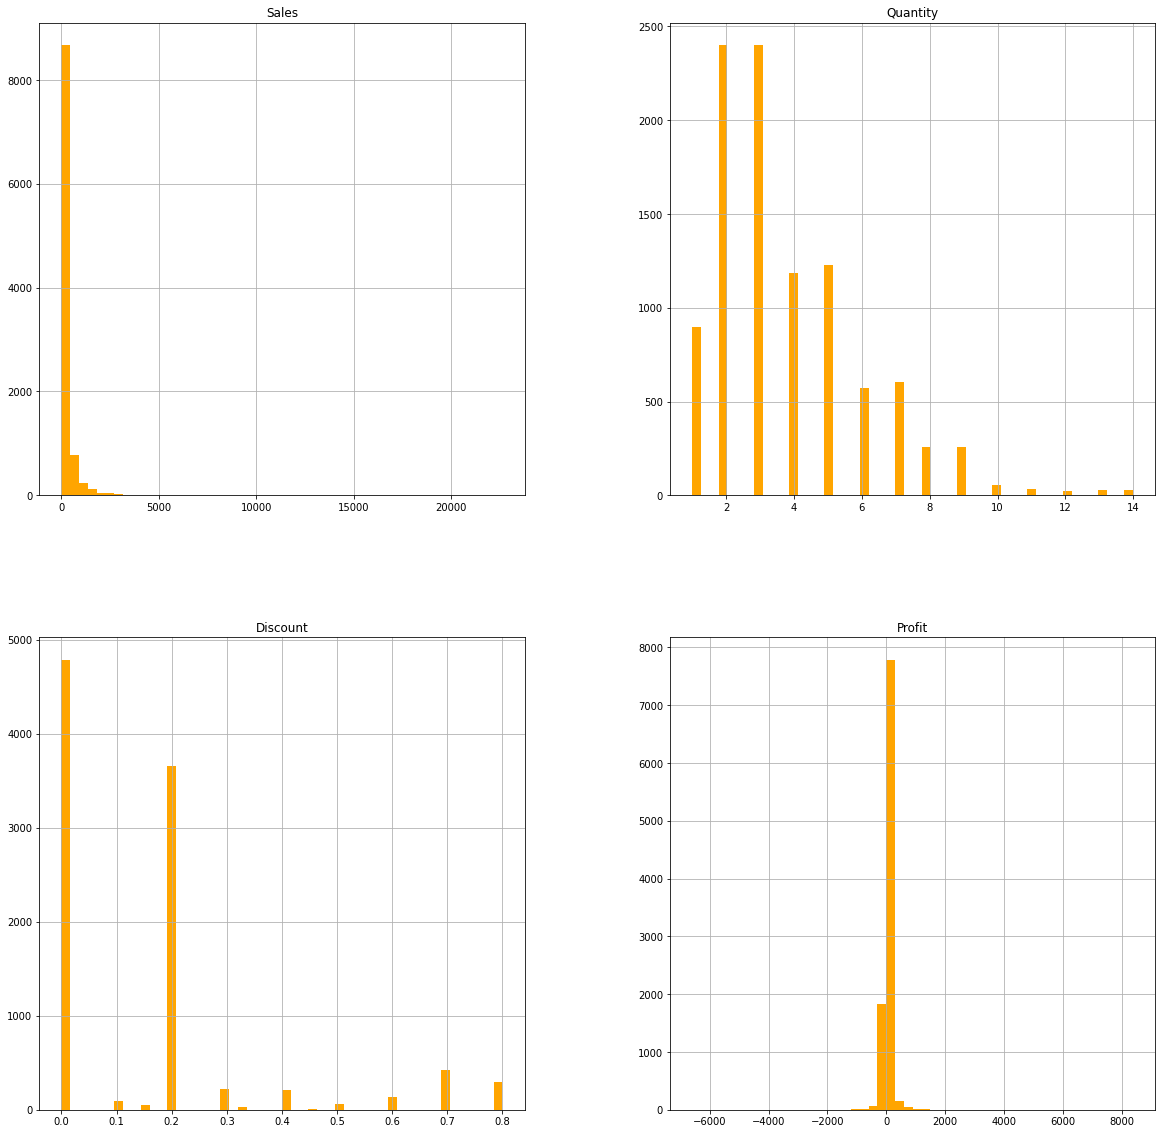

In [15]:
df.hist(bins=50,figsize=(20,20) , color = "orange")
plt.show()

In [16]:
s=(df['Segment'].value_counts()/len(df['Segment']*100))
s

Consumer       0.519495
Corporate      0.302195
Home Office    0.178310
Name: Segment, dtype: float64

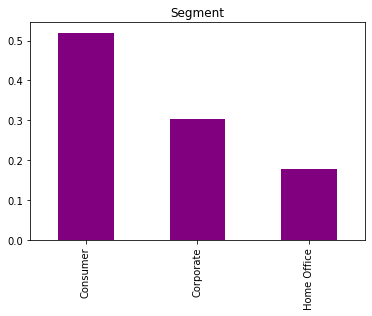

In [17]:
s.plot(kind='bar',title='Segment' , color = "purple")


**Here, we can see that 50% people belong to the consumer class, 30% of people belong to the corporate class whereas the remaining 20% of the people are from the home office class.**

In [18]:
sh=(df['Ship Mode'].value_counts()/len(df['Ship Mode'])*100)
sh

Standard Class    59.687281
Second Class      19.474792
First Class       15.405432
Same Day           5.432495
Name: Ship Mode, dtype: float64

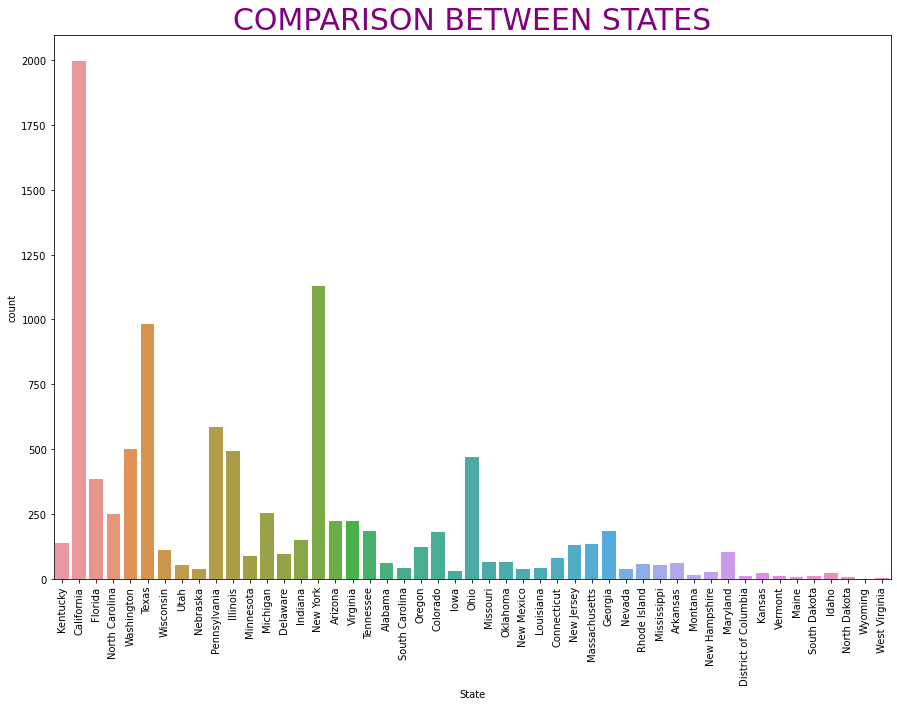

In [19]:
plt.figure(figsize=(15,10) )
sns.countplot(x=df['State'])
plt.title('COMPARISON BETWEEN STATES' , size = 30 , color = "purple")
plt.xticks(rotation=90)
plt.show()

In [20]:
c=(df['Category'].value_counts()/len(df['Category'])*100)
c

Office Supplies    60.258595
Furniture          21.228826
Technology         18.512579
Name: Category, dtype: float64

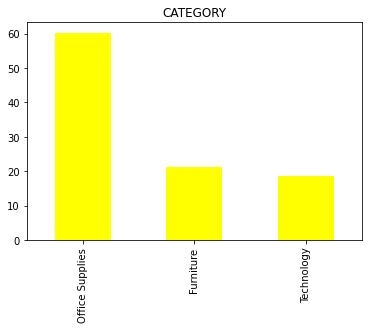

In [21]:
c.plot(kind='bar',color='yellow',title='CATEGORY')


<function matplotlib.pyplot.show>

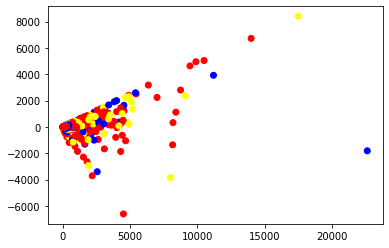

In [22]:
fig, ax=plt.subplots()
colors={'Consumer':'red','Corporate':'yellow','Home Office':'blue'}
ax.scatter(df['Sales'],df['Profit'],c=df['Segment'].apply(lambda x:colors[x]))
plt.show

**From the above observation we can say that consumer segment has more profit.**


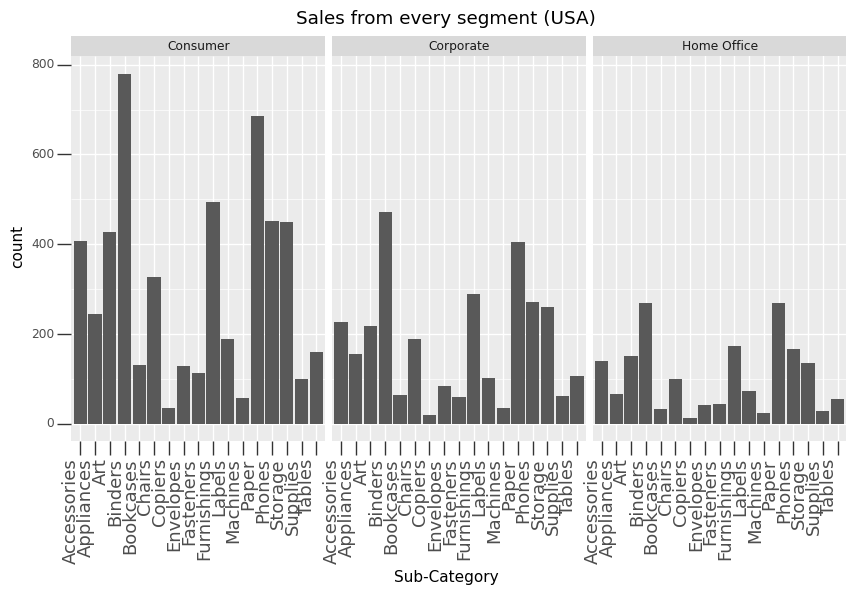

<ggplot: (8787372071985)>

In [23]:
flip_xlabels=theme(axis_text_x = element_text(angle=90, hjust=1), figure_size=(10,5),
                   axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(df, aes(x='Sub-Category',fill='Sales'))+ geom_bar()+facet_wrap(['Segment'])+flip_xlabels+theme(axis_text_x=element_text(size=13))+ggtitle("Sales from every segment (USA)"))

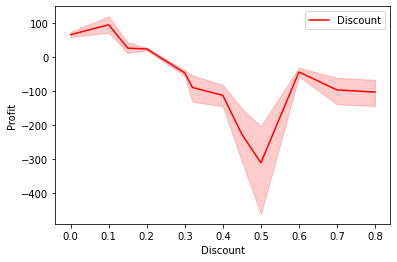

In [24]:
sns.lineplot('Discount','Profit',data=df,color='r',label='Discount')
plt.legend()
plt.show()

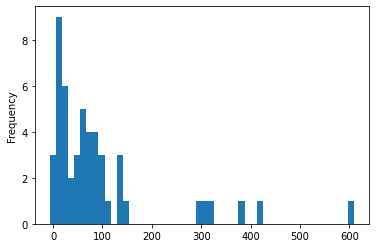

In [25]:
temp_data=df.loc[(df['Segment']=='Consumer')&(df['Discount']==0.1) ]
temp_data['Profit'].plot.hist(bins=50)

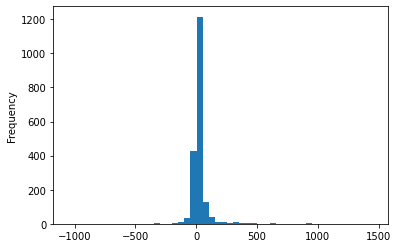

In [26]:
temp_data=df.loc[(df['Segment']=='Consumer')&(df['Discount']==0.2)]
temp_data['Profit'].plot.hist(bins=50)

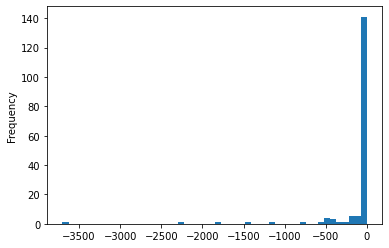

In [27]:
temp_data=df.loc[(df['Segment']=='Consumer')&(df['Discount']==0.8)]
temp_data['Profit'].plot.hist(bins=50)

**Here, we can say that when the superstore is offering discount less than 40%, it is getting profit as depicted by the above graphs.**

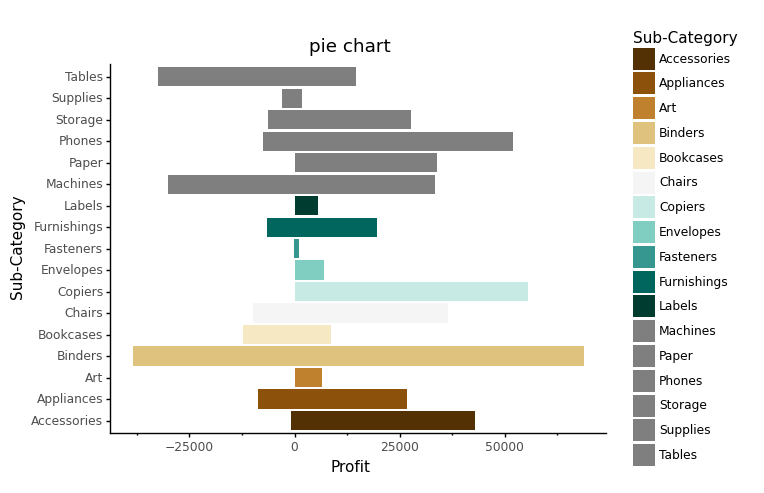

<ggplot: (8787373162113)>

In [28]:
Profit_plot=(ggplot(df, aes(x='Sub-Category',y='Profit',fill='Sub-Category'))+geom_col()+coord_flip()
+scale_fill_brewer(type='div',pelette='Spectral')+theme_classic()+ggtitle('pie chart'))
display(Profit_plot)

**Analysis of Sales**

In [29]:
def state_data_viewer(states):
    product_data = df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig,ax =plt.subplots(1, 3, figsize= (20,4))
        fig.suptitle(state, fontsize=14)
        ax_index =0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x=cat_data.Profit, y= cat_data.index, ax =ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index+=1
        
        fig.show()

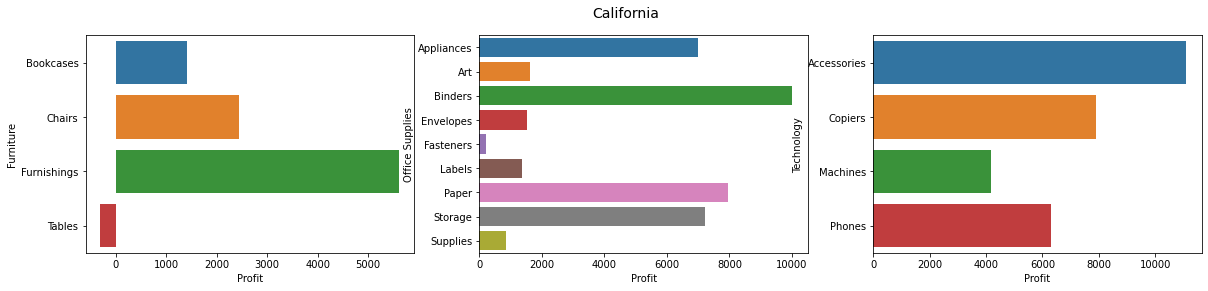

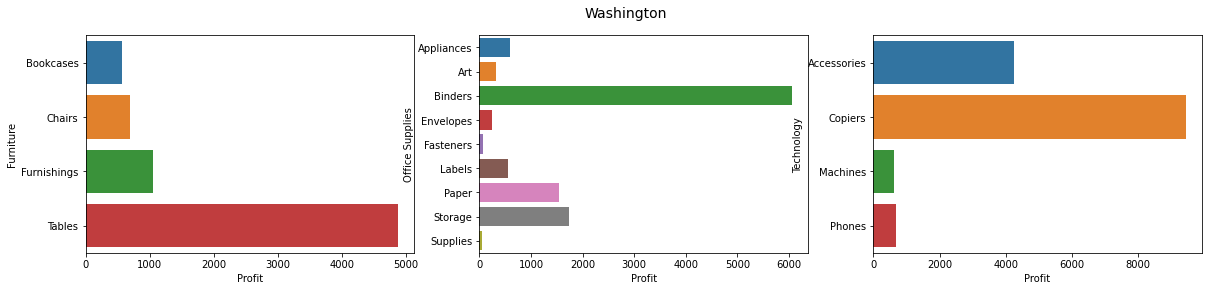

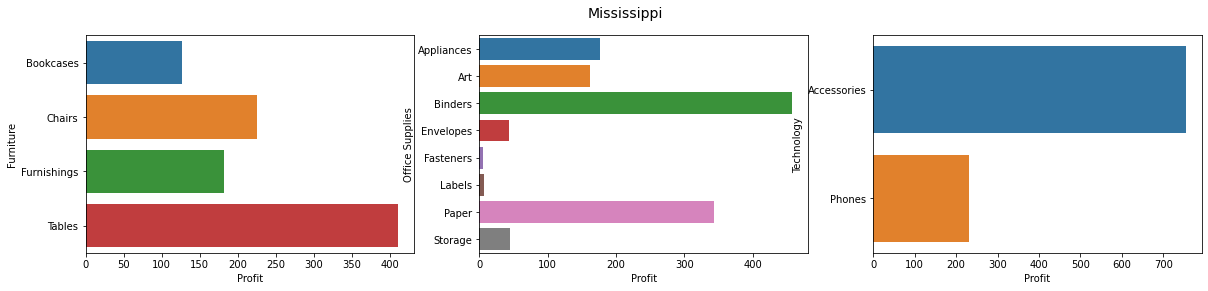

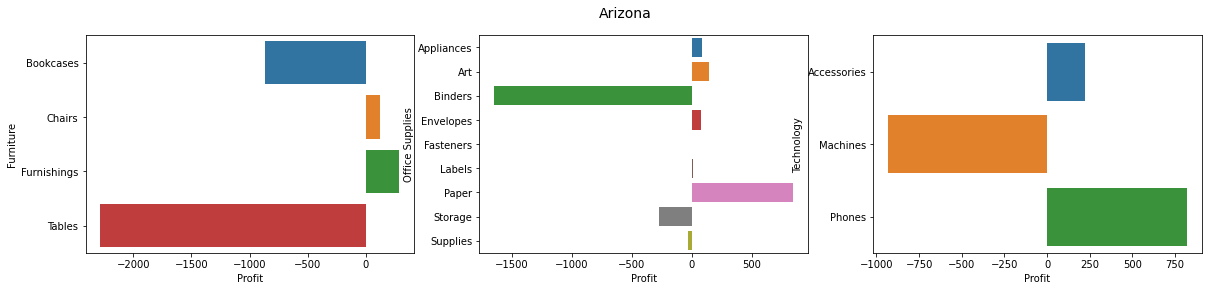

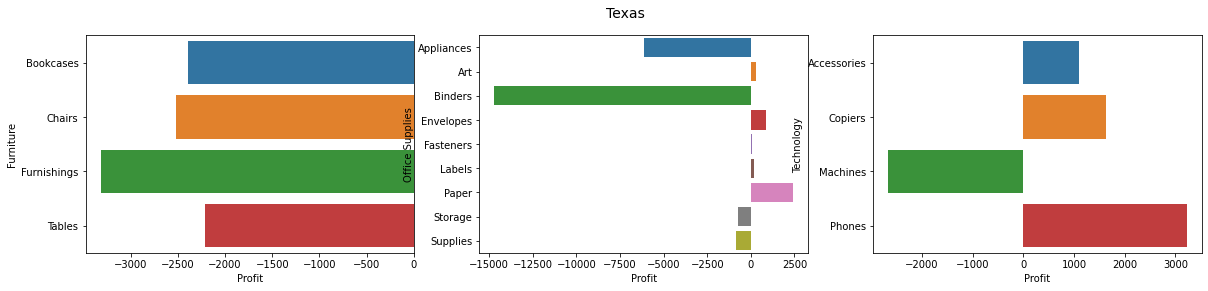

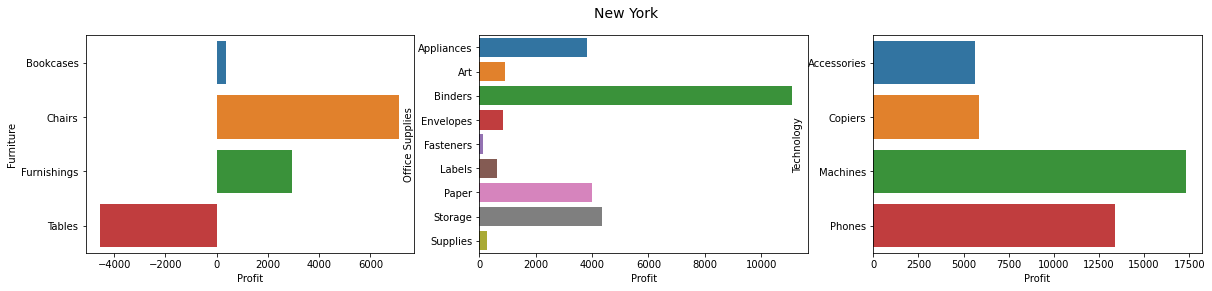

In [30]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas', 'New York']
state_data_viewer(states)

**CONCLUSION:**

**From the above data visualization, we have seen the states & category where sale and profit are high & less. Now, to find a solution to improve the profit in other states where the sales are low, we can work on the sales strategy and various offers.**